In [1]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

<IPython.core.display.Javascript object>

In [2]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
netflix_titles_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [6]:
netflix_titles_df.isnull().values.any()

True

In [8]:
netflix_titles_df.isnull().sum().sum()

3036

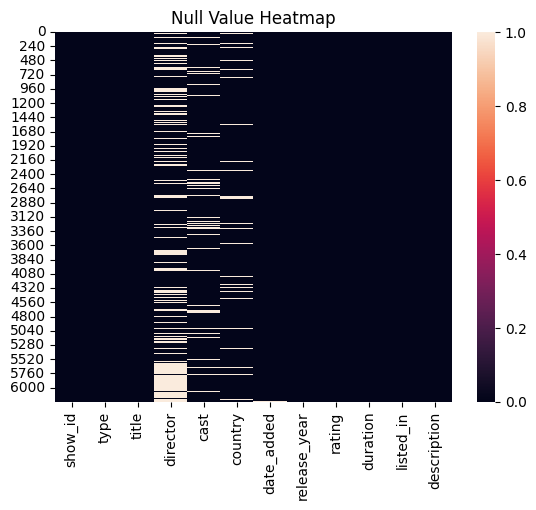

In [10]:
sns.heatmap(netflix_titles_df.isnull(), cbar  = True)
plt.title("Null Value Heatmap")
plt.show()

In [12]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [17]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type'] == 'Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [18]:
netflix_tvshow_df = netflix_titles_df[netflix_titles_df['type'] == 'TV Show'].copy()
netflix_tvshow_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No director,No cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",No country,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [20]:
netflix_movies_df.duration = netflix_movies_df.duration.astype(str).str.replace(' min','').astype(int)
netflix_tvshow_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_tvshow_df.replace({'seasons':{'1 Season' : '1 Seasons'}}, inplace=True)
#netflix_shows_df["seasons"]=netflix_shows_df["seasons"].replace({'1 Season':'1 Seasons'}, inplace=True)
netflix_tvshow_df.seasons = netflix_tvshow_df.seasons.astype(str).str.replace(' Seasons','').astype(int)

In [21]:
# Exploratory Analysis and Visualization

In [22]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7220\3400436029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(netflix_titles_df.type, palette = "pastel")


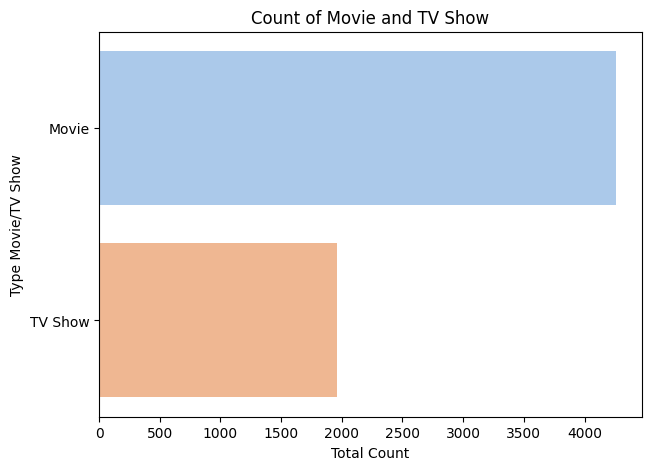

In [24]:
plt.figure(figsize = (7, 5))
g = sns.countplot(netflix_titles_df.type, palette = "pastel")
plt.title("Count of Movie and TV Show")
plt.xlabel("Total Count")
plt.ylabel("Type Movie/TV Show")
plt.show()

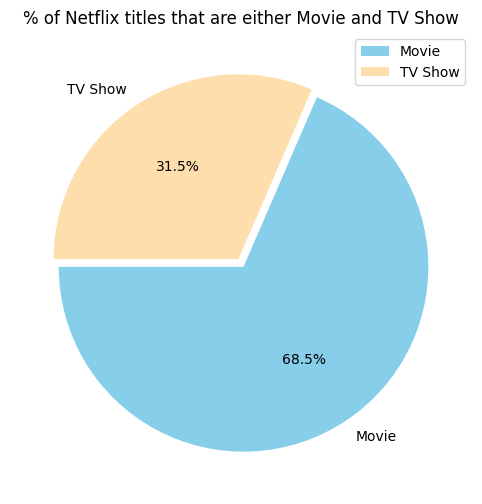

In [27]:
plt.figure(figsize = (12,6))
g = plt.pie(netflix_titles_df.type.value_counts(), explode = (0.025, 0.025), labels = netflix_titles_df.type.value_counts().index, colors = ['skyblue','navajowhite'], autopct = '%1.1f%%', startangle = 180)
plt.title("% of Netflix titles that are either Movie and TV Show")
plt.legend()
plt.show()

C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7220\131869692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="Set2", ax=ax[0]);
C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7220\131869692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g2 = sns.countplot(netflix_tvshow_df.rating, order=order,palette="Set2", ax=ax[1]);
C:\Users\GIGA G5\AppData\Local\Temp\ipykernel_7220\131869692.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


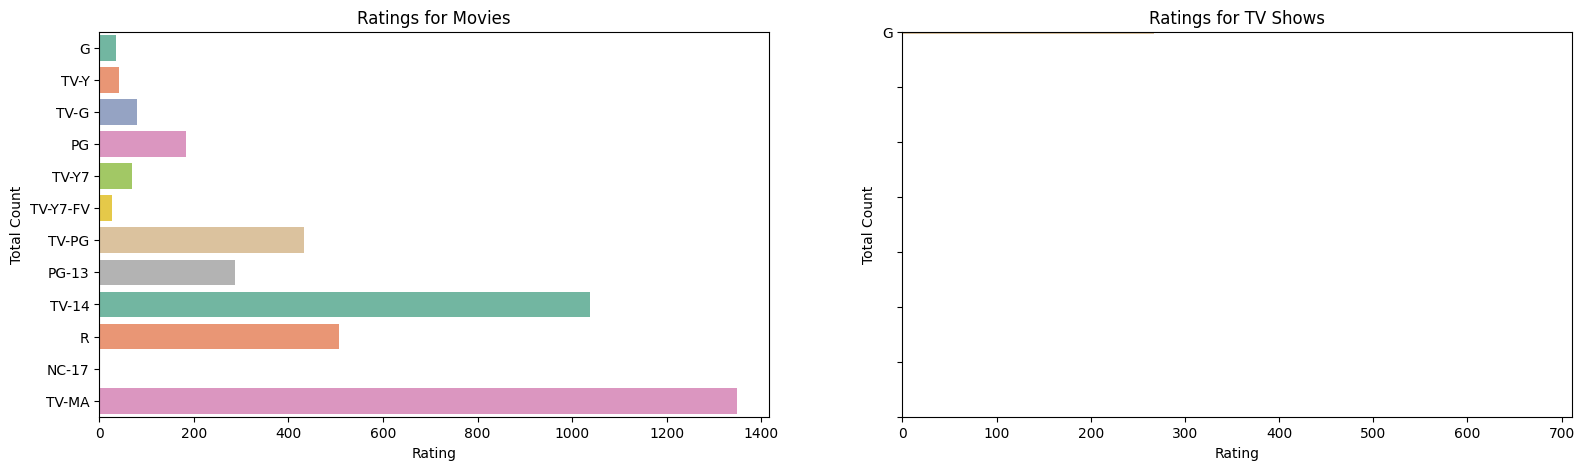

In [33]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(netflix_tvshow_df.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [35]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_tvshow_df['year_added'] = pd.DatetimeIndex(netflix_tvshow_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_tvshow_df['month_added'] = pd.DatetimeIndex(netflix_tvshow_df['date_added']).month